In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

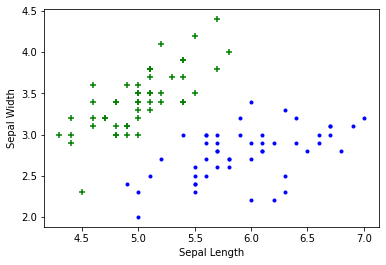

In [15]:
#Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

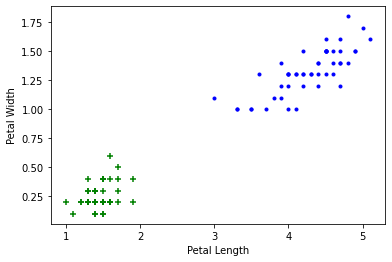

In [17]:
#Petal length vs Pepal Width (Setosa vs Versicolor)### 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [24]:
#Train test split

from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [25]:
#Create KNN (K Neighrest Neighbour Classifier)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)


In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.score(X_test,y_test)

0.9666666666666667

In [28]:
knn.predict([[4.8,3.0,1.5,0.3]])

c:\users\ahmet\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
#Plot Confusion Matrix
y_predicted = knn.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

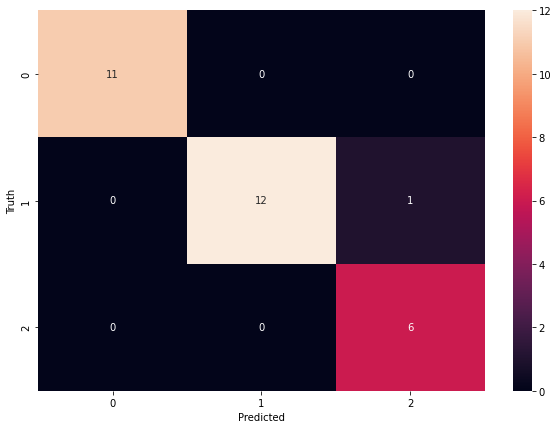

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot =True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
#Print classification report for precesion, recall and f1-score for each classes

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Exercise

In [37]:


import pandas as pd
from sklearn.datasets import load_digits
digits= load_digits()

In [38]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [40]:
#Split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

In [57]:
##Create KNN (K Neighrest Neighbour Classifier)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
len(X_train)

1437

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [59]:
knn.score(X_test,y_test)

0.9777777777777777

# Grid SearchCV

In [60]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,5,10,12,15]
},return_train_score = False)
clf.fit(digits.data,digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00080318, 0.00099907, 0.00100126, 0.0004003 , 0.00060253]),
 'std_fit_time': array([4.01608475e-04, 3.86973258e-06, 8.06404806e-07, 4.90309277e-04,
        4.91977958e-04]),
 'mean_score_time': array([0.0202177 , 0.02221632, 0.0226182 , 0.0232986 , 0.02361917]),
 'std_score_time': array([0.00040004, 0.00039786, 0.00048923, 0.00092081, 0.00049233]),
 'param_n_neighbors': masked_array(data=[3, 5, 10, 12, 15],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 12},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.95555556, 0.94722222, 0.93055556, 0.93611111, 0.93611111]),
 'split1_test_score': array([0.95833333, 0.95555556, 0.94722222, 0.95277778, 0.95      ]),
 'split2_test_score': array([0.96657382, 0.96657382, 0.96935933, 0.96935933, 0.96935933]),
 'split3_test_score': array([0.98607242, 0.98050139, 0.97

In [61]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000803,4.016085e-04,0.020218,0.000400,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,1
1,0.000999,3.869733e-06,0.022216,0.000398,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,2
2,0.001001,8.064048e-07,0.022618,0.000489,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,4
3,0.000400,4.903093e-04,0.023299,0.000921,12,{'n_neighbors': 12},0.936111,0.952778,0.969359,0.974930,0.949861,0.956608,0.013990,3
4,0.000603,4.919780e-04,0.023619,0.000492,15,{'n_neighbors': 15},0.936111,0.950000,0.969359,0.972145,0.947075,0.954938,0.013746,5


In [62]:
df[['mean_test_score', 'param_n_neighbors']]

,mean_test_score,param_n_neighbors
0,0.966622,3
1,0.962728,5
2,0.954943,10
3,0.956608,12
4,0.954938,15


# Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  0, 35]], dtype=int64)

Text(42.0, 0.5, 'Truth')

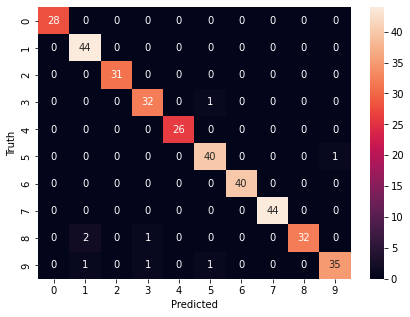

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')